## IBC-BR - Índice de Atividade Econômica (Banco Central)

In [1]:
# Importando bibliotecas necessárias:

import requests # biblioteca para acessar e interagir com APIs e páginas da web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Bibliotecas para decomposição de séries:

from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
#Biblioteca para Análise de Estacionariedade por Teste de ADF

from statsmodels.tsa.stattools import adfuller

In [4]:
# Biblioteca para Geração de Gráfico de Função de Autocorrelação e Autocorrelação Parcial

from statsmodels.graphics.tsaplots import plot_acf

from statsmodels.graphics.tsaplots import plot_pacf

### Carregamento dos dados que foram baixados do site do IPEA em formato csv, com separador ";"

In [6]:
#Importando arquivo csv do IBC-Br (o separador é ;)

df_ibc = pd.read_csv("Dados/dados_IBC.csv", sep = ";")

# Exibição das primeiras linhas do DataFrame
df_ibc.head()

,Data,"IBC-Br - índice real (2022=100) - - - Banco Central do Brasil, Sistema Gerenciador de Séries Temporais (Bacen Outras/SGS) - SGS12_IBCBR12","IBC-Br - índice real dessazonalizado (2022=100) - - - Banco Central do Brasil, Sistema Gerenciador de Séries Temporais (Bacen Outras/SGS) - SGS12_IBCBRDESSAZ12",Unnamed: 3
0,2003.01,"96,15","100,46",NaN
1,2003.02,"98,67","102,1",NaN
2,2003.03,"103,41","101,71",NaN
3,2003.04,"102,19","101,09",NaN
4,2003.05,"100,3","99,98",NaN


In [8]:
#Remoção da coluna "Unnamed: 3"

df_ibc.drop("Unnamed: 3", axis = 1, inplace = True)

In [9]:
#Renomeando colunas:

df_ibc.columns = ["Mês", "IBC-BR - Número índice", "IBC-BR dessazonal - Número Índice"]

In [10]:
#Criação de coluna de datas iniciando em 2003-01-31, com frequência mensal no formato AAAA-MM-DD

datas = pd.date_range(start='2003-01-31', periods=df_ibc.shape[0], freq='M').strftime('%Y-%m-%d')
df_ibc.insert(0, 'Data', datas)
df_ibc.head()

,Data,Mês,IBC-BR - Número índice,IBC-BR dessazonal - Número Índice
0,2003-01-31,2003.01,"96,15","100,46"
1,2003-02-28,2003.02,"98,67","102,1"
2,2003-03-31,2003.03,"103,41","101,71"
3,2003-04-30,2003.04,"102,19","101,09"
4,2003-05-31,2003.05,"100,3","99,98"


In [11]:
#Remoção da coluna "Mês"

df_ibc.drop("Mês", axis = 1, inplace = True)

In [12]:
df_ibc

,Data,IBC-BR - Número índice,IBC-BR dessazonal - Número Índice
0,2003-01-31,"96,15","100,46"
1,2003-02-28,"98,67","102,1"
2,2003-03-31,"103,41","101,71"
3,2003-04-30,"102,19","101,09"
4,2003-05-31,"100,3","99,98"
...,...,...,...
261,2024-10-31,"109,49845","107,96121"
262,2024-11-30,"105,76017","108,0041"
263,2024-12-31,"104,44111","107,325"
264,2025-01-31,"103,05176","108,31633"


In [13]:
#Conversão de dados em formato string para float:

df_ibc["IBC-BR - Número índice"] = df_ibc["IBC-BR - Número índice"].str.replace(',', '.').astype(float)
df_ibc["IBC-BR dessazonal - Número Índice"] = df_ibc["IBC-BR dessazonal - Número Índice"].str.replace(',', '.').astype(float)

In [14]:
# Criação de uma nova coluna com a variação percentual mensal da coluna "IBC-BR - Número índice"

df_ibc['IBC-BR Variação Mensal (%)'] = df_ibc['IBC-BR - Número índice'].pct_change() * 100

In [16]:
# Criação de uma nova coluna com a variação percentual mensal da coluna "IBC-BR dessazonal - Número índice"

df_ibc['IBC-BR Dessazonal Variação Mensal (%)'] = df_ibc['IBC-BR dessazonal - Número Índice'].pct_change() * 100

In [17]:
df_ibc.columns

Index(['Data', 'IBC-BR - Número índice', 'IBC-BR dessazonal - Número Índice',
       'IBC-BR Variação Mensal (%)', 'IBC-BR Dessazonal Variação Mensal (%)'],
      dtype='object')

In [18]:
#Remoção de linhas contendo NAN

df_ibc = df_ibc.dropna()

In [19]:
df_ibc

,Data,IBC-BR - Número índice,IBC-BR dessazonal - Número Índice,IBC-BR Variação Mensal (%),IBC-BR Dessazonal Variação Mensal (%)
1,2003-02-28,98.67000,102.10000,2.620905,1.632491
2,2003-03-31,103.41000,101.71000,4.803892,-0.381978
3,2003-04-30,102.19000,101.09000,-1.179770,-0.609576
4,2003-05-31,100.30000,99.98000,-1.849496,-1.098031
5,2003-06-30,98.58000,100.15000,-1.714855,0.170034
...,...,...,...,...,...
261,2024-10-31,109.49845,107.96121,2.037204,-0.043367
262,2024-11-30,105.76017,108.00410,-3.414003,0.039727
263,2024-12-31,104.44111,107.32500,-1.247218,-0.628772
264,2025-01-31,103.05176,108.31633,-1.330271,0.923671


In [ ]:
#Reset do índice do df_ibc

df_ibc = df_ibc.reset_index(drop=True)

In [23]:
df_ibc

,Data,IBC-BR - Número índice,IBC-BR dessazonal - Número Índice,IBC-BR Variação Mensal (%),IBC-BR Dessazonal Variação Mensal (%)
0,2003-02-28,98.67000,102.10000,2.620905,1.632491
1,2003-03-31,103.41000,101.71000,4.803892,-0.381978
2,2003-04-30,102.19000,101.09000,-1.179770,-0.609576
3,2003-05-31,100.30000,99.98000,-1.849496,-1.098031
4,2003-06-30,98.58000,100.15000,-1.714855,0.170034
...,...,...,...,...,...
260,2024-10-31,109.49845,107.96121,2.037204,-0.043367
261,2024-11-30,105.76017,108.00410,-3.414003,0.039727
262,2024-12-31,104.44111,107.32500,-1.247218,-0.628772
263,2025-01-31,103.05176,108.31633,-1.330271,0.923671


## Ajuste do formato de data para AAAA - MM - DD

In [24]:
#Download da biblioteca de formatação de data
from datetime import datetime

In [25]:
# Criação de um dataframe do tipo datetime

date_rng = pd.date_range(start = '2/28/2003', 
                         end = '02/28/2025', 
                         freq = 'M')

In [26]:
#Checando se o comprimento do dataframe de data é igual ao comprimento do dataframe da variação mensal da PIM-PF

len(date_rng) == len(df_ibc.index)

True

In [27]:
#Inclusão do dataframe date_rng no dataframe df_ipp_var

df_ibc.insert(0,        # coluna de indice 0
            'Mês',    # nome da nova coluna
            date_rng)  # dados

In [28]:
#Exclusão da coluna "Data"

df_ibc = df_ibc.drop(["Data"], axis = 1)

In [29]:
df_ibc

,Mês,IBC-BR - Número índice,IBC-BR dessazonal - Número Índice,IBC-BR Variação Mensal (%),IBC-BR Dessazonal Variação Mensal (%)
0,2003-02-28,98.67000,102.10000,2.620905,1.632491
1,2003-03-31,103.41000,101.71000,4.803892,-0.381978
2,2003-04-30,102.19000,101.09000,-1.179770,-0.609576
3,2003-05-31,100.30000,99.98000,-1.849496,-1.098031
4,2003-06-30,98.58000,100.15000,-1.714855,0.170034
...,...,...,...,...,...
260,2024-10-31,109.49845,107.96121,2.037204,-0.043367
261,2024-11-30,105.76017,108.00410,-3.414003,0.039727
262,2024-12-31,104.44111,107.32500,-1.247218,-0.628772
263,2025-01-31,103.05176,108.31633,-1.330271,0.923671


In [31]:
df_ibc.columns

Index(['Mês', 'IBC-BR - Número índice', 'IBC-BR dessazonal - Número Índice',
       'IBC-BR Variação Mensal (%)', 'IBC-BR Dessazonal Variação Mensal (%)'],
      dtype='object')

In [36]:
df_ibc.iloc[250:, :]

,Mês,IBC-BR - Número índice,IBC-BR dessazonal - Número Índice,IBC-BR Variação Mensal (%),IBC-BR Dessazonal Variação Mensal (%)
250,2023-12-31,144.72000,147.98000,-0.034538,0.366251
251,2024-01-31,141.67000,149.13000,-2.107518,0.777132
252,2024-02-29,146.06000,150.39000,3.098751,0.844900
253,2024-03-31,156.81000,149.93000,7.359989,-0.305871
254,2024-04-30,109.46070,105.64623,-30.195332,-29.536297
255,2024-05-31,104.84744,105.94819,-4.214535,0.285822
256,2024-06-30,105.93926,106.76450,1.041342,0.770480
257,2024-07-31,111.74977,106.88720,5.484756,0.114926
258,2024-08-31,110.24967,107.18603,-1.342374,0.279575
259,2024-09-30,107.31228,108.00805,-2.664307,0.766910


## Gráficos das Séries do IBC-Br e IBC-Br dessazonalizado em Número Índice

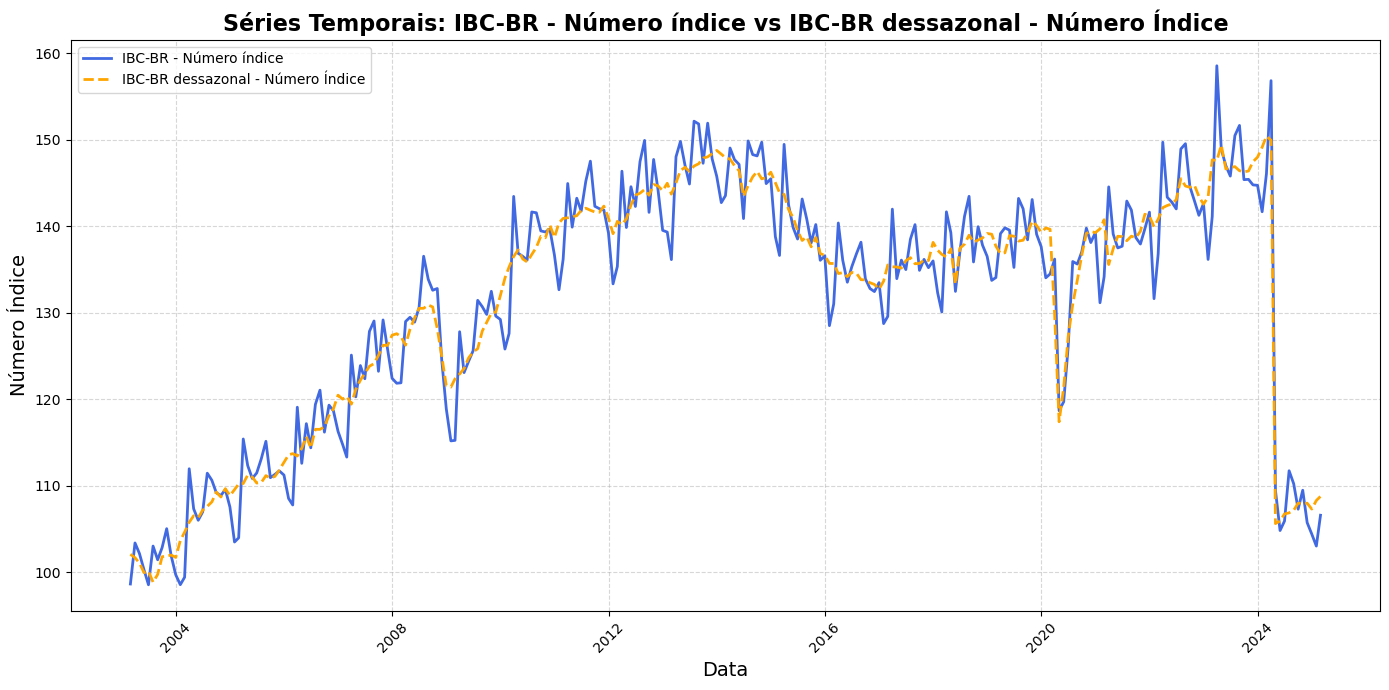

In [35]:
plt.figure(figsize=(14, 7))
plt.plot(df_ibc["Mês"], df_ibc["IBC-BR - Número índice"], label="IBC-BR - Número índice", color="royalblue", linewidth=2)
plt.plot(df_ibc["Mês"], df_ibc["IBC-BR dessazonal - Número Índice"], label="IBC-BR dessazonal - Número Índice", color="orange", linewidth=2, linestyle="--")
plt.title("Séries Temporais: IBC-BR - Número índice vs IBC-BR dessazonal - Número Índice", fontsize=16, weight='bold')
plt.xlabel("Data", fontsize=14)
plt.ylabel("Número Índice", fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## IBC-Br Variação Mensal % (sem ajuste sazonal)

### Gráficos da Série Temporal da Variação Mensal do IBC-Br (sem ajuste sazonal)

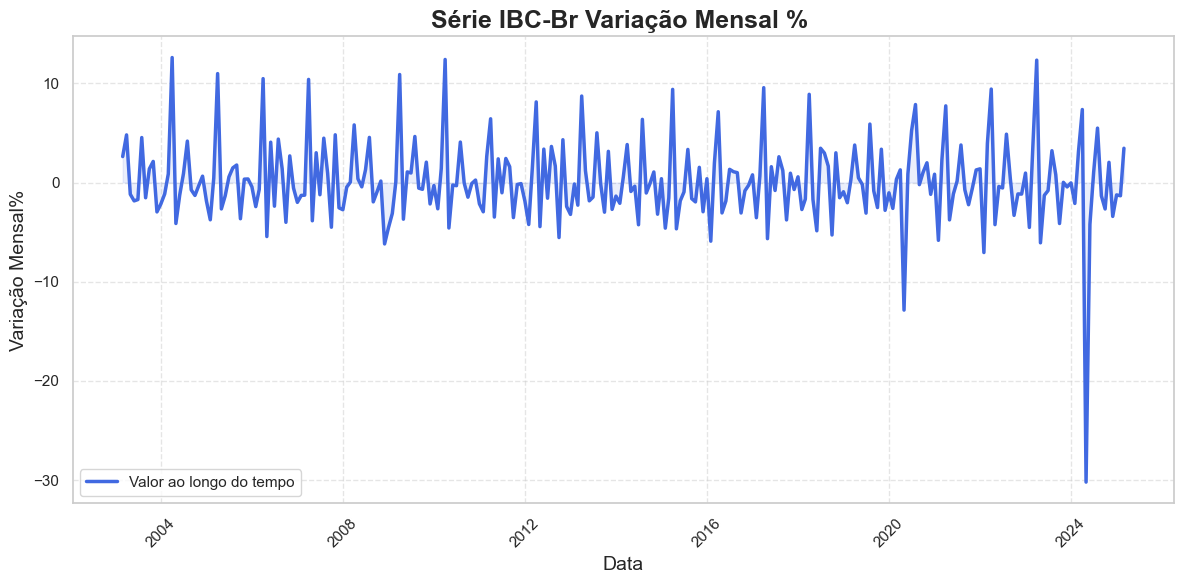

In [76]:
#Definição de estilo de gráfico

sns.set(style="whitegrid")

# Criação do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_ibc["Mês"], df_ibc["IBC-BR Variação Mensal (%)"], color='royalblue', linewidth=2.5, label='Valor ao longo do tempo')
plt.fill_between(df_ibc["Mês"], df_ibc["IBC-BR Variação Mensal (%)"], alpha=0.1, color='royalblue')

# Customizações
plt.title('Série IBC-Br Variação Mensal % ', fontsize=18, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Variação Mensal%', fontsize=14)

plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Deixar o fundo branco e clean
plt.gca().set_facecolor('white')
plt.tight_layout()

# Exibir
plt.show()

### Avaliação de Estacionariedade da Série

In [77]:
#Teste de ADF - Variação Mensal do IBC-Br sem ajuste sazonal

resultado = adfuller(df_ibc["IBC-BR Variação Mensal (%)"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -2.353643
p-value: 0.155250
Valores Críticos:
	1%: -3.456
	5%: -2.873
	10%: -2.573


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Logo, no caso de nível de confiança de 95%, não se rejeita a hipótese nula de que a série do IBC-Br Variação Mensal (sem ajuste sazonal) não seja estacionária. A série não é, portanto, estacionária.

### Decomposição da Série

In [78]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos.
#Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df_ibc["IBC-BR Variação Mensal (%)"], model='additive', period = 12)

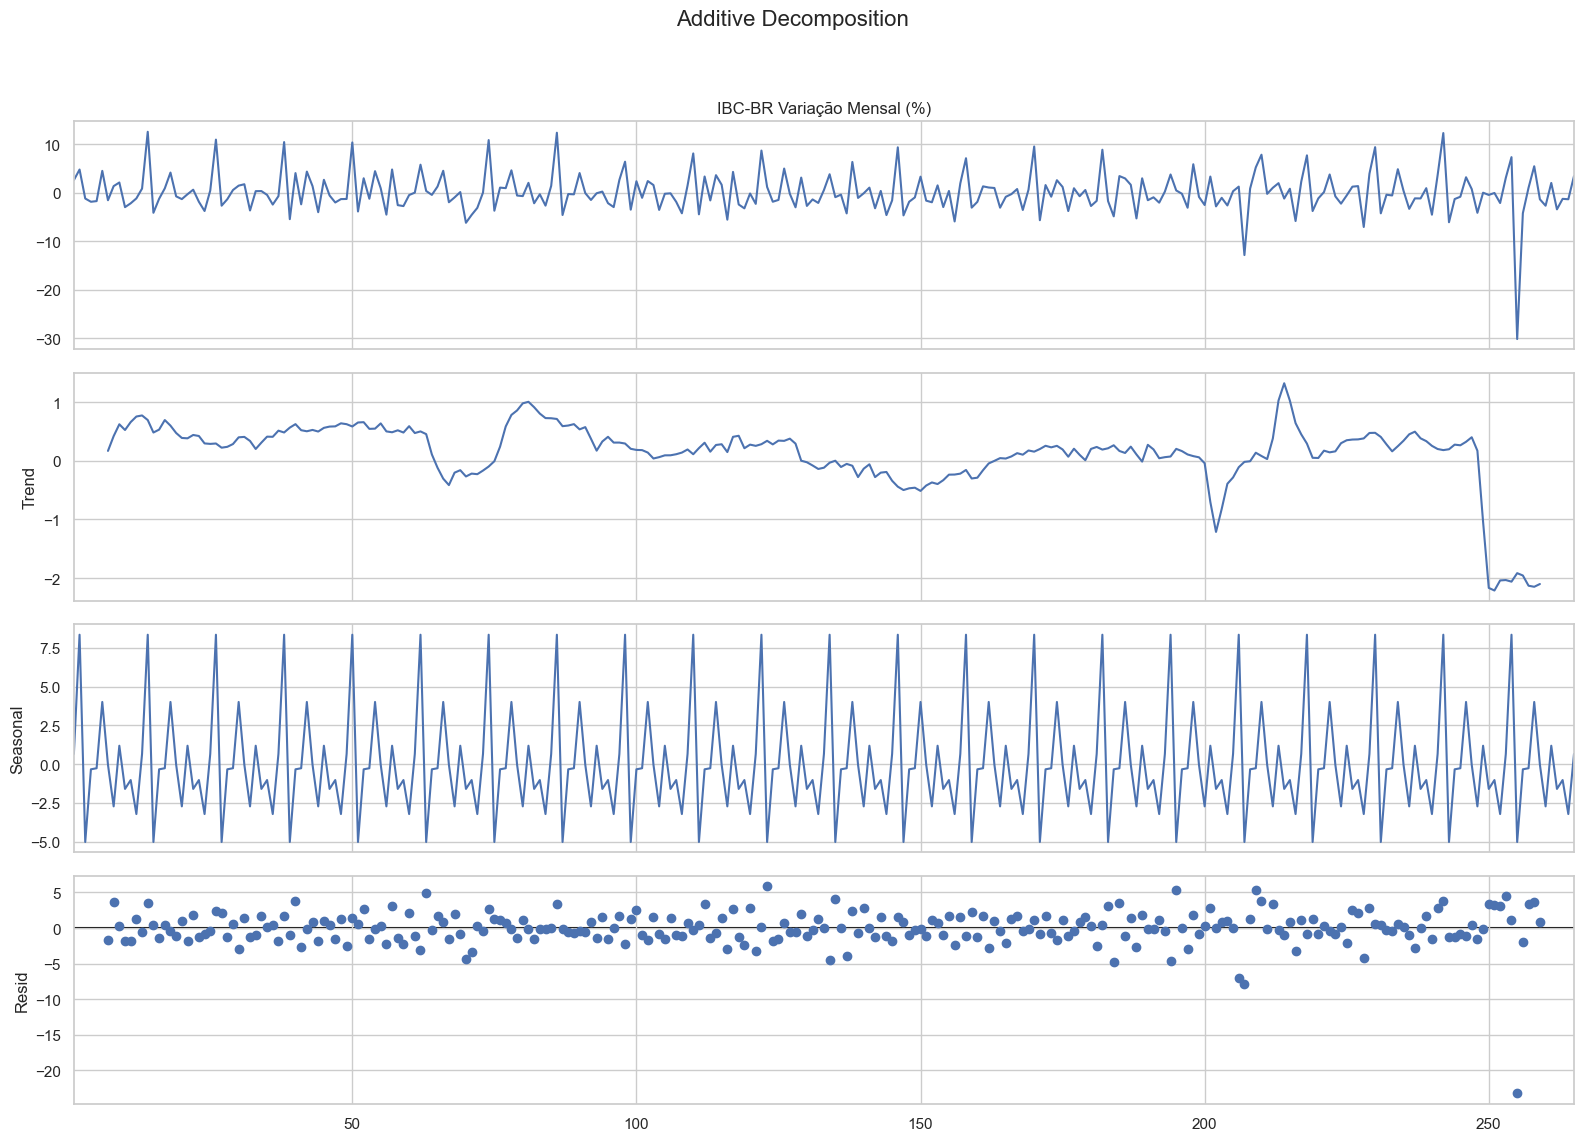

In [79]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gráficos de Funções de Autocorrelação e Autocorrelação Parcial

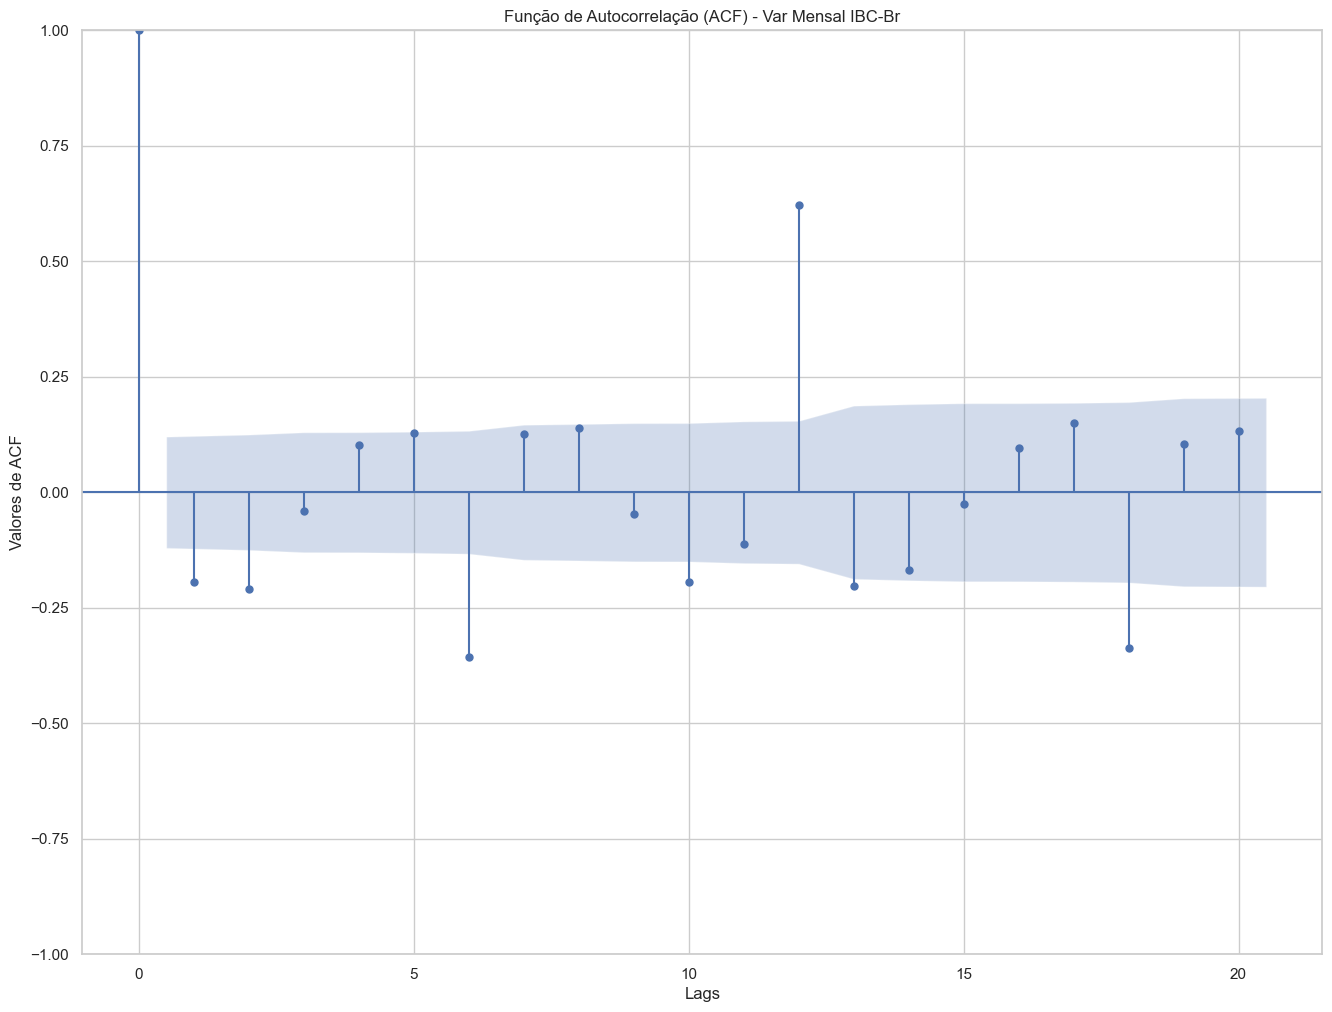

In [81]:
#Gráfico de ACF

plot_acf(df_ibc["IBC-BR Variação Mensal (%)"], lags=20)
plt.title("Função de Autocorrelação (ACF) - Var Mensal IBC-Br")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

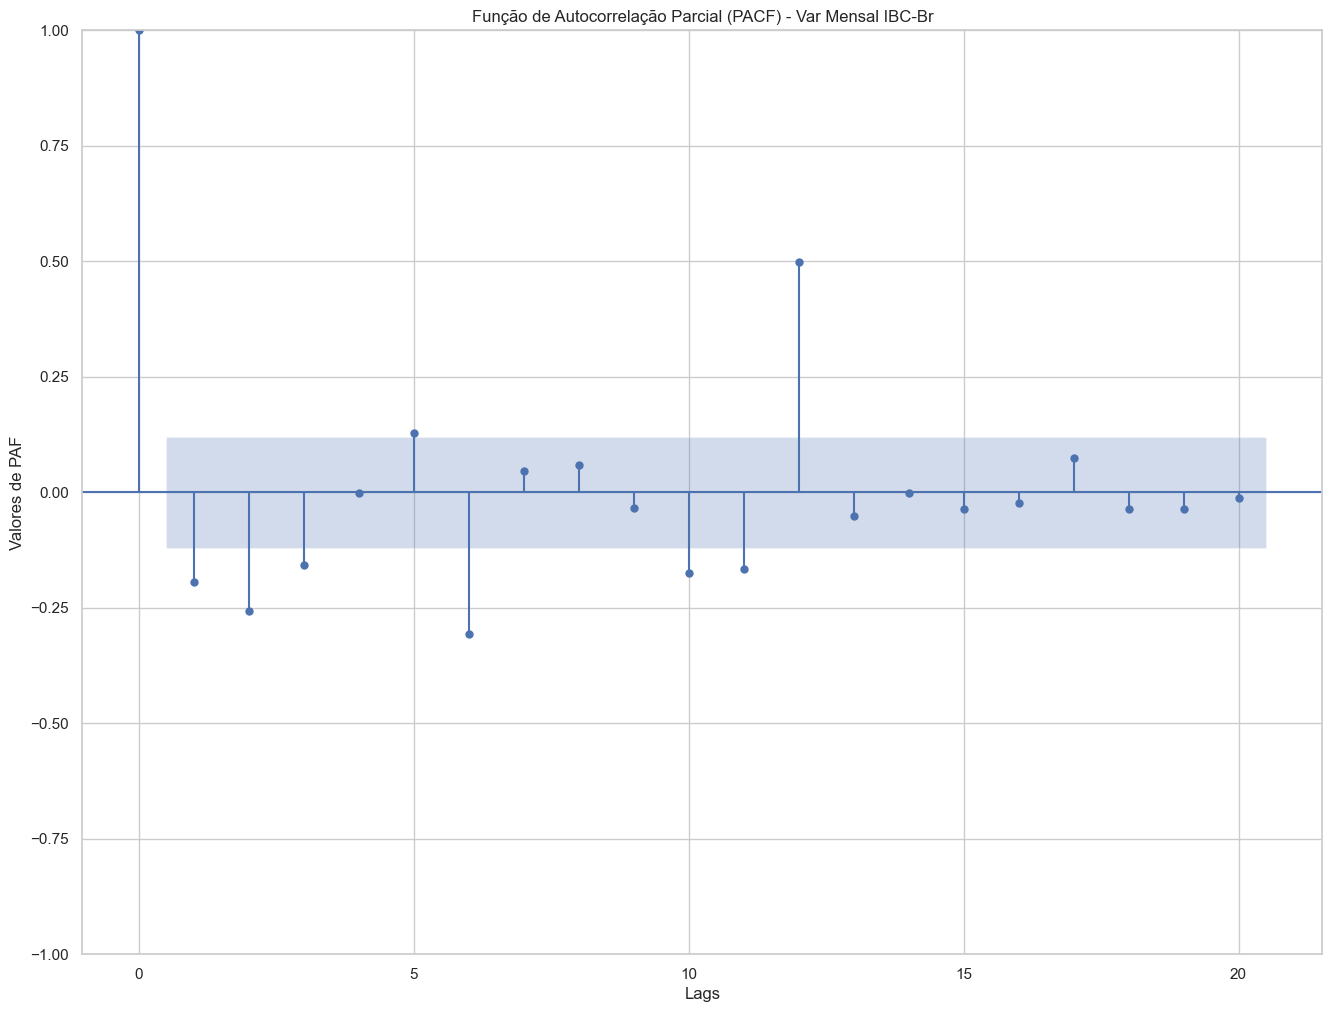

In [82]:
#Gráfico de PACF

plot_pacf(df_ibc["IBC-BR Variação Mensal (%)"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - Var Mensal IBC-Br")
plt.xlabel("Lags")
plt.ylabel("Valores de PAF")
plt.show()

## IBC-Br Variação Mensal % (dessazonalizado)

### Gráficos da Série Temporal da Variação Mensal do IBC-Br (dessazonalizado)

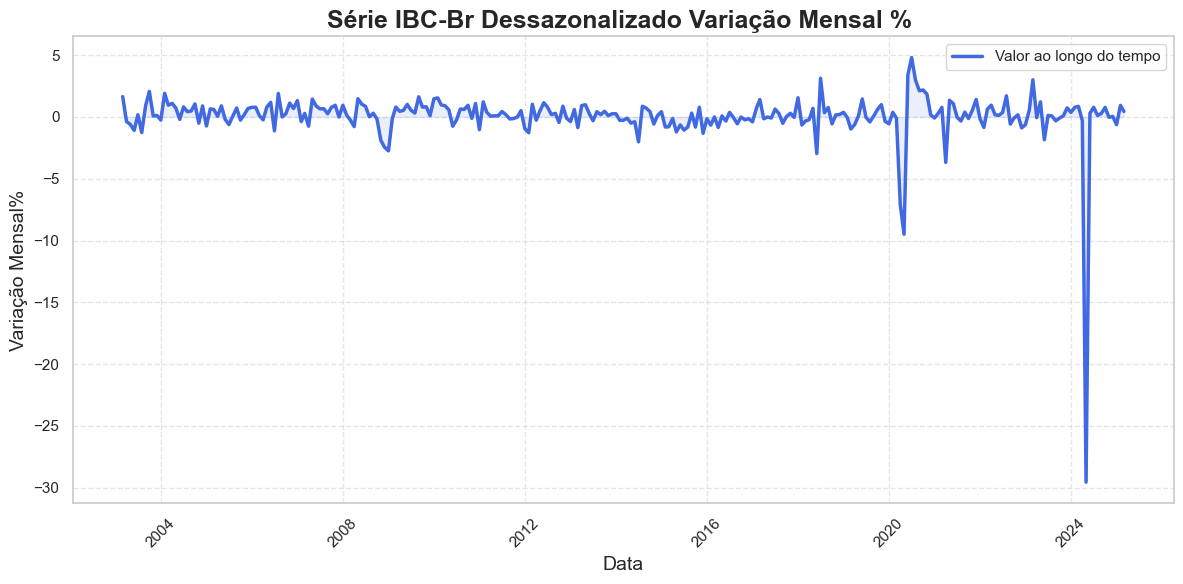

In [83]:
#Definição de estilo de gráfico

sns.set(style="whitegrid")

# Criação do gráfico
plt.figure(figsize=(12, 6))
plt.plot(df_ibc["Mês"], df_ibc["IBC-BR Dessazonal Variação Mensal (%)"], color='royalblue', linewidth=2.5, label='Valor ao longo do tempo')
plt.fill_between(df_ibc["Mês"], df_ibc["IBC-BR Dessazonal Variação Mensal (%)"], alpha=0.1, color='royalblue')

# Customizações
plt.title('Série IBC-Br Dessazonalizado Variação Mensal % ', fontsize=18, weight='bold')
plt.xlabel('Data', fontsize=14)
plt.ylabel('Variação Mensal%', fontsize=14)

plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

# Deixar o fundo branco e clean
plt.gca().set_facecolor('white')
plt.tight_layout()

# Exibir
plt.show()

### Avaliação de Estacionariedade da Série

In [84]:
#Teste de ADF - Variação Mensal do IBC-Br Dessazonalizado

resultado = adfuller(df_ibc["IBC-BR Dessazonal Variação Mensal (%)"])
print('Estatística do Teste ADF: %f' % resultado[0])
print('p-value: %f' % resultado[1])
print('Valores Críticos:')
for key, value in resultado[4].items():
    print('\t%s: %.3f' % (key, value))

Estatística do Teste ADF: -15.044993
p-value: 0.000000
Valores Críticos:
	1%: -3.455
	5%: -2.873
	10%: -2.573


As hipóteses do teste de ADF são:

H0: times series não é estacionária e

H1: time series é estacionária.

Se p-valor é menor do que o nível de confiança escolhido, então a hipótese nula é rejeitada.

Logo, no caso de nível de confiança de 95%, se rejeita a hipótese nula de que a série do IBC-Br Dessazonalizado - Variação Mensal (sem ajuste sazonal) não seja estacionária. A série é, portanto, estacionária.

### Decomposição da Série

In [86]:
# Multiplicative Decomposition  - Não é adequado para séries com valores 0 e negativos.
#Portanto, será utilizada a additive decomposition.


# Additive Decomposition
additive_decomposition = seasonal_decompose(df_ibc["IBC-BR Dessazonal Variação Mensal (%)"], model='additive', period = 12)

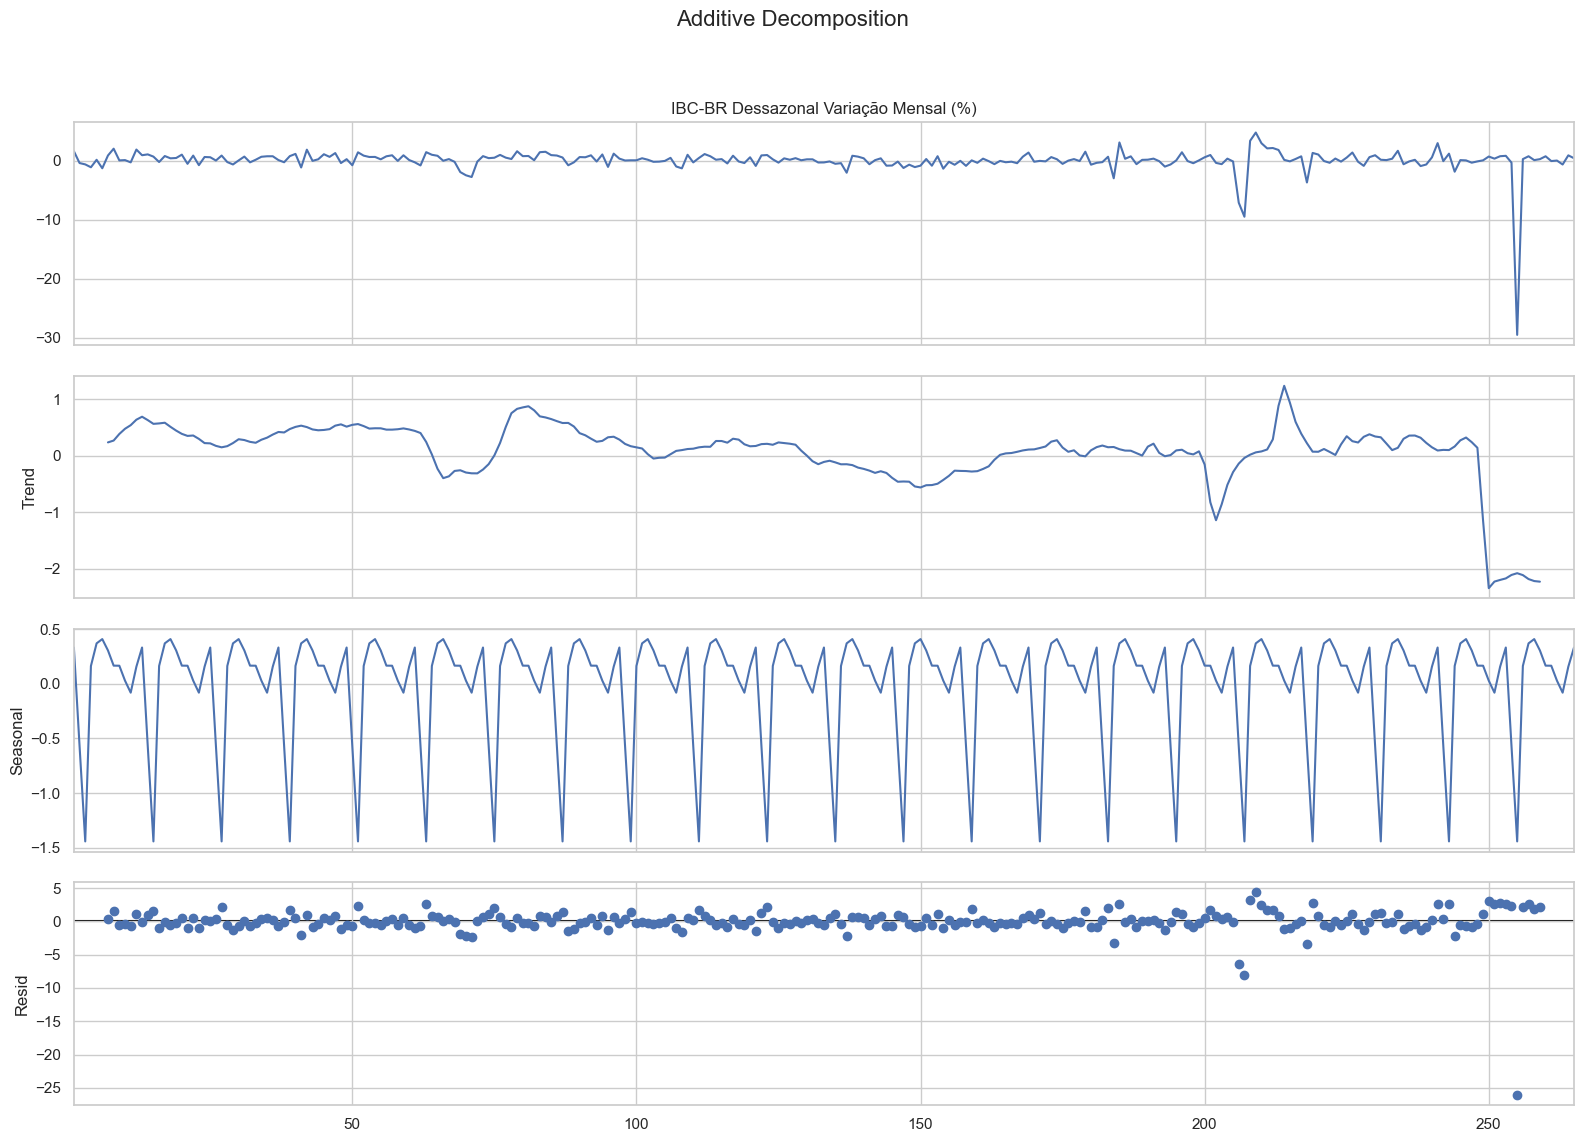

In [87]:
# Plot do Gráfico
plt.rcParams.update({'figure.figsize': (16,12)})
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

### Gráficos de Funções de Autocorrelação e Autocorrelação Parcial

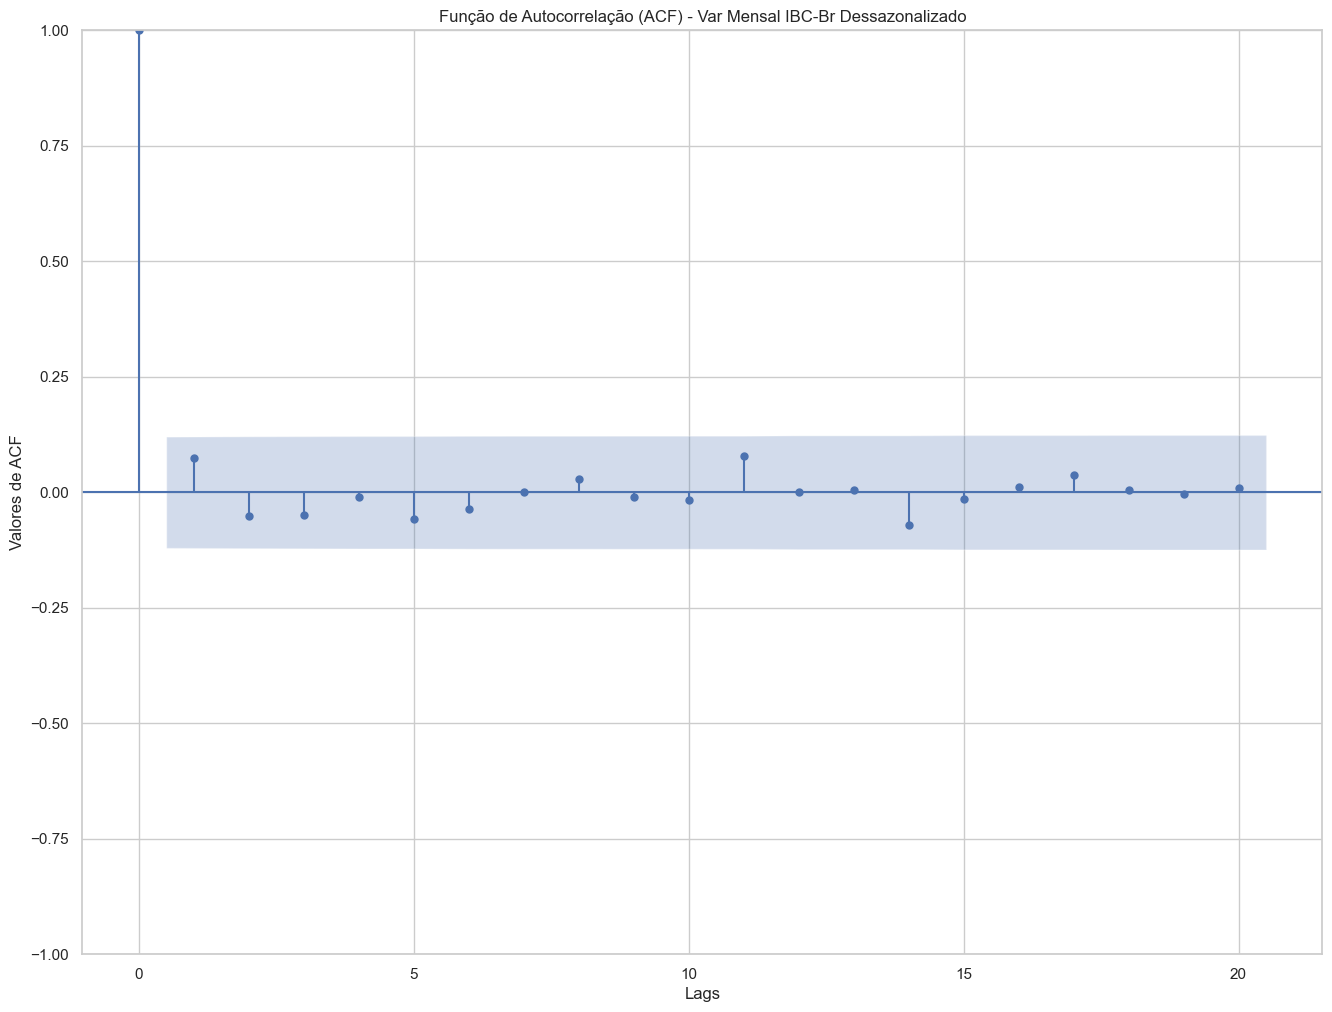

In [88]:
#Gráfico de ACF

plot_acf(df_ibc["IBC-BR Dessazonal Variação Mensal (%)"], lags=20)
plt.title("Função de Autocorrelação (ACF) - Var Mensal IBC-Br Dessazonalizado")
plt.xlabel("Lags")
plt.ylabel("Valores de ACF")
plt.show()

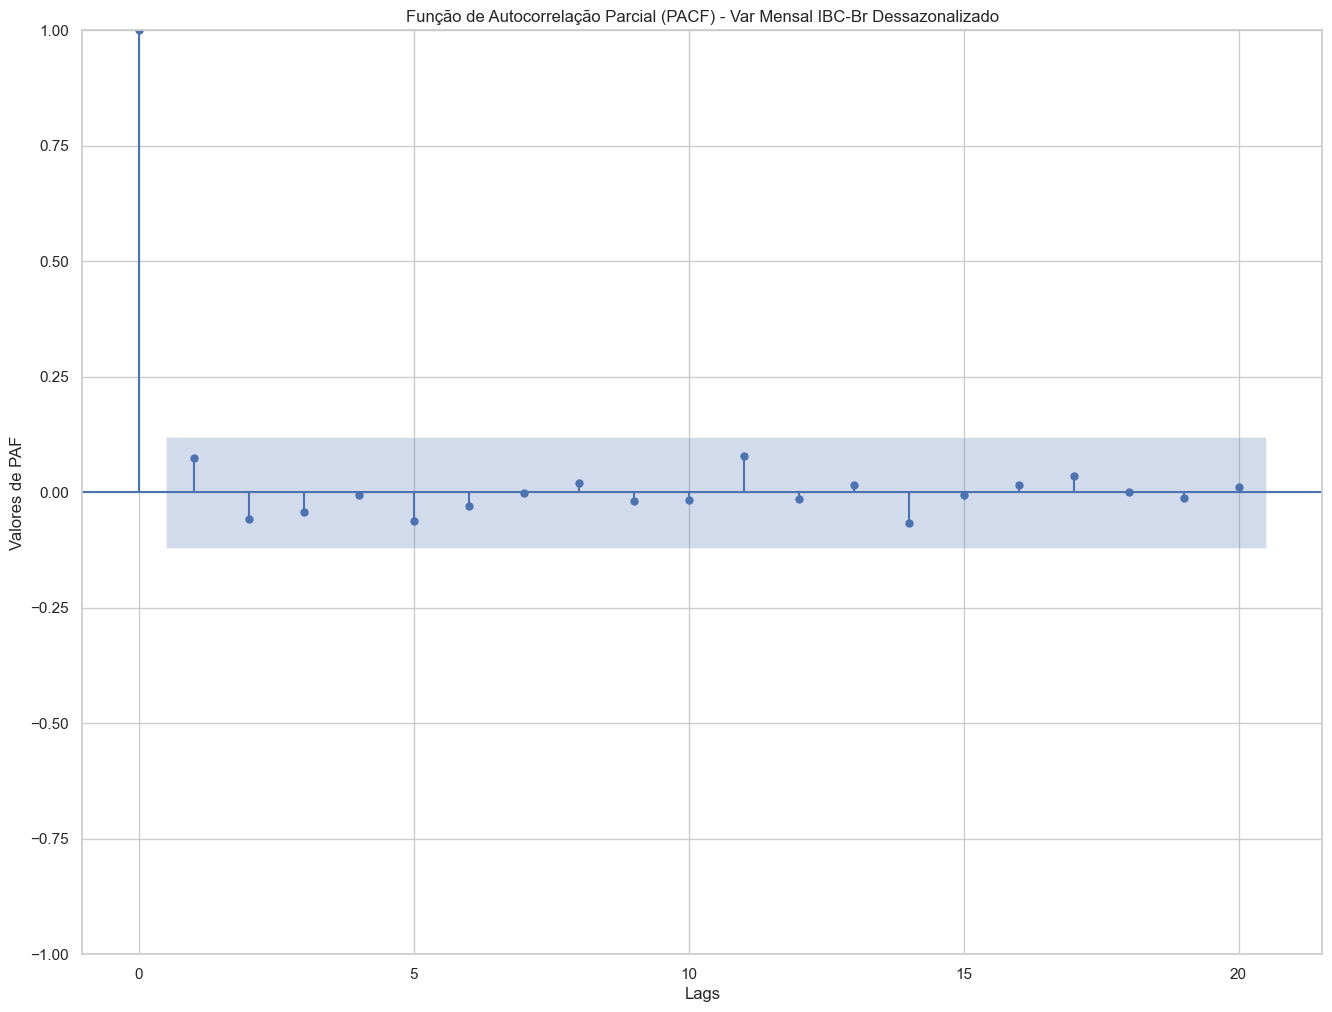

In [89]:
#Gráfico de PACF

plot_pacf(df_ibc["IBC-BR Dessazonal Variação Mensal (%)"], lags=20)
plt.title("Função de Autocorrelação Parcial (PACF) - Var Mensal IBC-Br Dessazonalizado")
plt.xlabel("Lags")
plt.ylabel("Valores de PAF")
plt.show()

### Criação de base de dados em formato csv

In [92]:
df_ibc.to_csv("base_dados_ibc.csv", index=False)